In [41]:
import geopandas as gpd
import descartes
import pandas as pd


In [42]:
fp = './BCN_UNITATS_ADM/0301040100_Barris_UNITATS_ADM.shp'

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((430162.188 4581936.985, 430550.104 4..."
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((431189.907 4581851.447, 431332.429 4..."
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((432798.734 4582081.260, 432805.852 4..."
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((430697.039 4583695.771, 430804.422 4..."
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((429554.907 4582761.816, 429647.231 4..."


In [43]:


df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [40.387739, 41.387739, 43.387739, 41.387739, 41.1387739],
     'Longitude': [2.151873, 2.011873, 2.151873, 2.251873, 2.151873]})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

df.head()


#geometry = gpd.points_from_xy(p1, p2)

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,40.387739,2.151873,POINT (2.15187 40.38774)
1,Brasilia,Brazil,41.387739,2.011873,POINT (2.01187 41.38774)
2,Santiago,Chile,43.387739,2.151873,POINT (2.15187 43.38774)
3,Bogota,Colombia,41.387739,2.251873,POINT (2.25187 41.38774)
4,Caracas,Venezuela,41.138774,2.151873,POINT (2.15187 41.13877)


In [44]:
#hg.crs = {'init' :'epsg:4326'}  
# ^ comment out to get a "Cannot transform naive geometries" error below

# project to merkator
#hg.to_crs({'init': 'epsg:3395'})


gdf.crs = {'init' :'epsg:4326'}  
projected = gdf.to_crs({'init':'epsg=3857'})

#map_df=map_df.to_crs(epsg=5000)
import contextily as ctx
ax = projected.plot(figsize=(20, 20), alpha=0.5)
ctx.add_basemap(ax)

/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


CRSError: Invalid projection: +init=epsg=3857 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=epsg=3857 +type=crs)

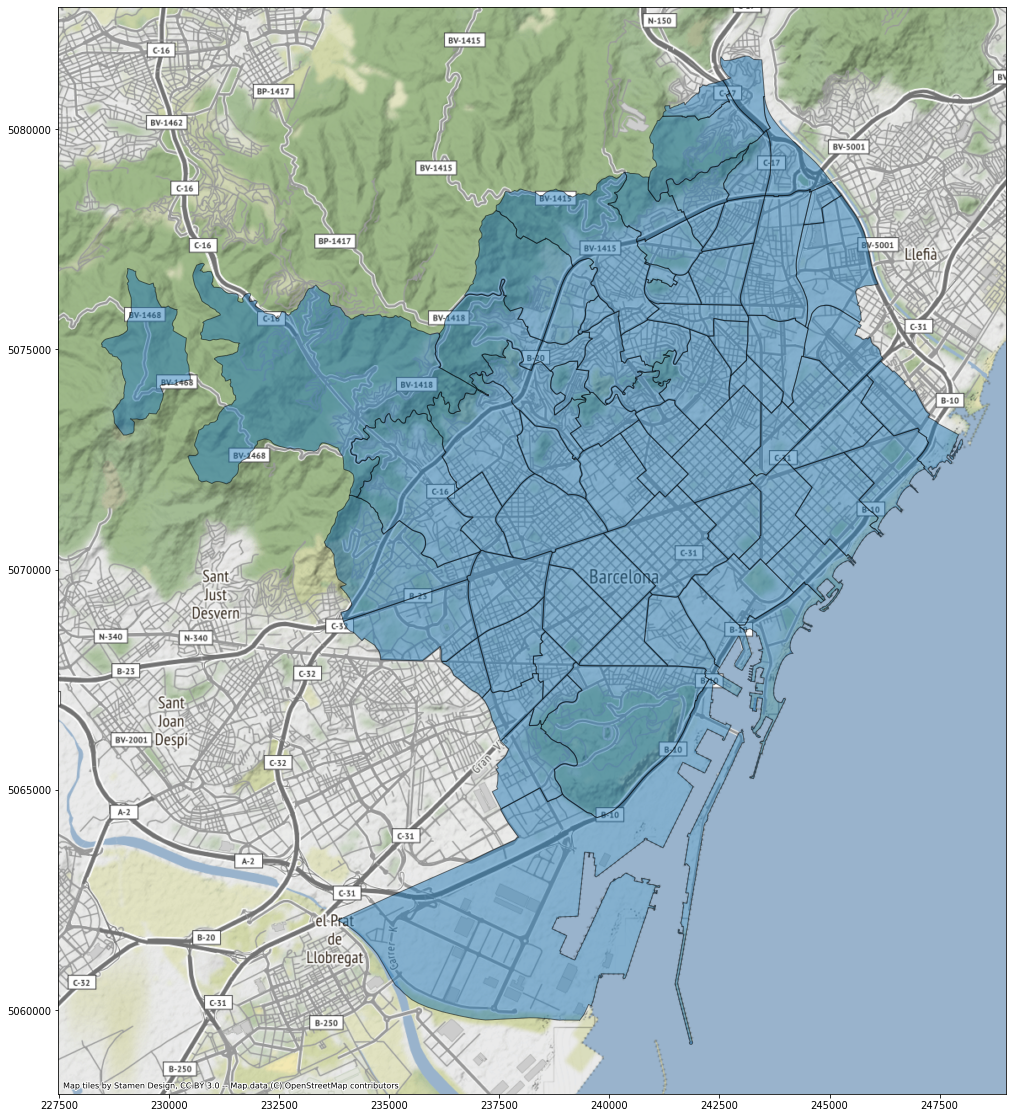

In [45]:
#map_df.plot(figsize=(15,15))




map_df = map_df.to_crs(epsg=3857)
#map_df=map_df.to_crs(epsg=5000)
import contextily as ctx
ax = map_df.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [46]:
map_df.shape

(73, 47)

In [11]:
for i in map_df.NOM.unique():
    print(i)

el Raval
el Barri GÃ²tic
la Barceloneta
la Dreta de l'Eixample
l'Antiga Esquerra de l'Eixample
la Nova Esquerra de l'Eixample
Sant Antoni
el Poble-sec
la Marina del Prat Vermell
la Marina de Port
la Font de la Guatlla
Sant Pere, Santa Caterina i la Ribera
el Fort Pienc
la Sagrada FamÃ­lia
les Tres Torres
Sant Gervasi - la Bonanova
el Putxet i el FarrÃ³
Sant Gervasi - Galvany
Vallcarca i els Penitents
el Coll
la Salut
la Vila de GrÃ cia
el Camp d'en Grassot i GrÃ cia Nova
el Baix GuinardÃ³
el GuinardÃ³
Can BarÃ³
el Carmel
la Teixonera
Sant GenÃ­s dels Agudells
Montbau
la Vall d'Hebron
la Clota
la Font d'en Fargues
Horta
Vilapicina i la Torre Llobeta
Porta
el TurÃ³ de la Peira
Hostafrancs
la Bordeta
Sants - Badal
Sants
les Corts
la Maternitat i Sant Ramon
Pedralbes
Vallvidrera, el Tibidabo i les Planes
SarriÃ 
la Trinitat Vella
BarÃ³ de Viver
el Bon Pastor
Sant Andreu
la Sagrera
el CongrÃ©s i els Indians
Navas
el Camp de l'Arpa del Clot
el Clot
el Parc i la Llacuna del Poblenou
la Vila O